In [1]:
from qiskit.circuit.library.arithmetic import IntegerComparator, ModularAdderGate
from qiskit.quantum_info import Statevector
from qiskit.circuit import QuantumCircuit, QuantumRegister
import qiskit.quantum_info as qi
from long_division_divider import ctrl_sbt, cmpr, long_division_divider
import numpy as np

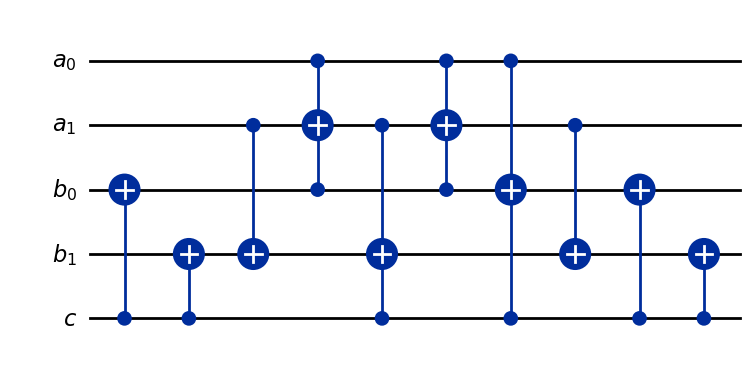

In [2]:
test_circuit = ctrl_sbt(2)
test_circuit.draw('mpl') #, wire_order=[6,3,0,4,1,5,2]) #, wire_order=[8, 4, 0, 5, 1, 6, 2, 7, 3])

In [3]:
state = Statevector.from_label(
    #C BBB AAA       B - A A
    '0000000'
)
# + Statevector.from_label(
#     #C BBB AAA
#     '0101111'
#     )
state /= np.sqrt(state.inner(state))

state = state.evolve(test_circuit)

# print(state.probabilities([6]))
# print(state.probabilities([3,4,5]))
state.draw('latex')

<IPython.core.display.Latex object>

In [4]:
errs = 0
for b in range(2**3):
    for a in range(2**3):
        if b < a:
            continue
        state = Statevector.from_label(
            #C BBB AAA       B - A A
            f'1{b:03b}{a:03b}'
        )
        state = state.evolve(test_circuit)
        if b - a != state.probabilities([1,2,3]).argmax():
            print(f'Error: {b:03b} - {a:03b} = {state.probabilities([1,2,3]).argmax()}')
            errs += 1
print(errs / (2**3 * 2**3))
        

Error: 001 - 000 = 4
Error: 001 - 001 = 4
Error: 010 - 000 = 0
Error: 010 - 001 = 6
Error: 010 - 010 = 5
Error: 011 - 000 = 4
Error: 011 - 011 = 7
Error: 100 - 000 = 0
Error: 100 - 001 = 0
Error: 100 - 010 = 1
Error: 100 - 100 = 2
Error: 101 - 000 = 4
Error: 101 - 010 = 5
Error: 101 - 011 = 5
Error: 101 - 100 = 6
Error: 101 - 101 = 6
Error: 110 - 000 = 0
Error: 110 - 001 = 6
Error: 110 - 010 = 5
Error: 110 - 101 = 0
Error: 110 - 110 = 7
Error: 111 - 000 = 4
Error: 111 - 001 = 2
Error: 111 - 010 = 1
Error: 111 - 011 = 7
Error: 111 - 100 = 6
Error: 111 - 101 = 4
Error: 111 - 110 = 3
Error: 111 - 111 = 1
0.453125


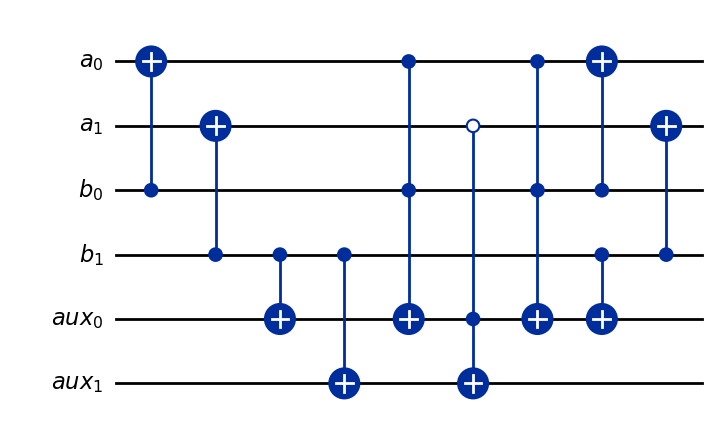

In [5]:
cmp_circuit = cmpr(2)
cmp_circuit.draw('mpl')

In [6]:
state = Statevector.from_label(
    #CC BB AA
    '001111'
    )
state = state.evolve(cmp_circuit)
state.draw('latex')

<IPython.core.display.Latex object>

3
3
3
3


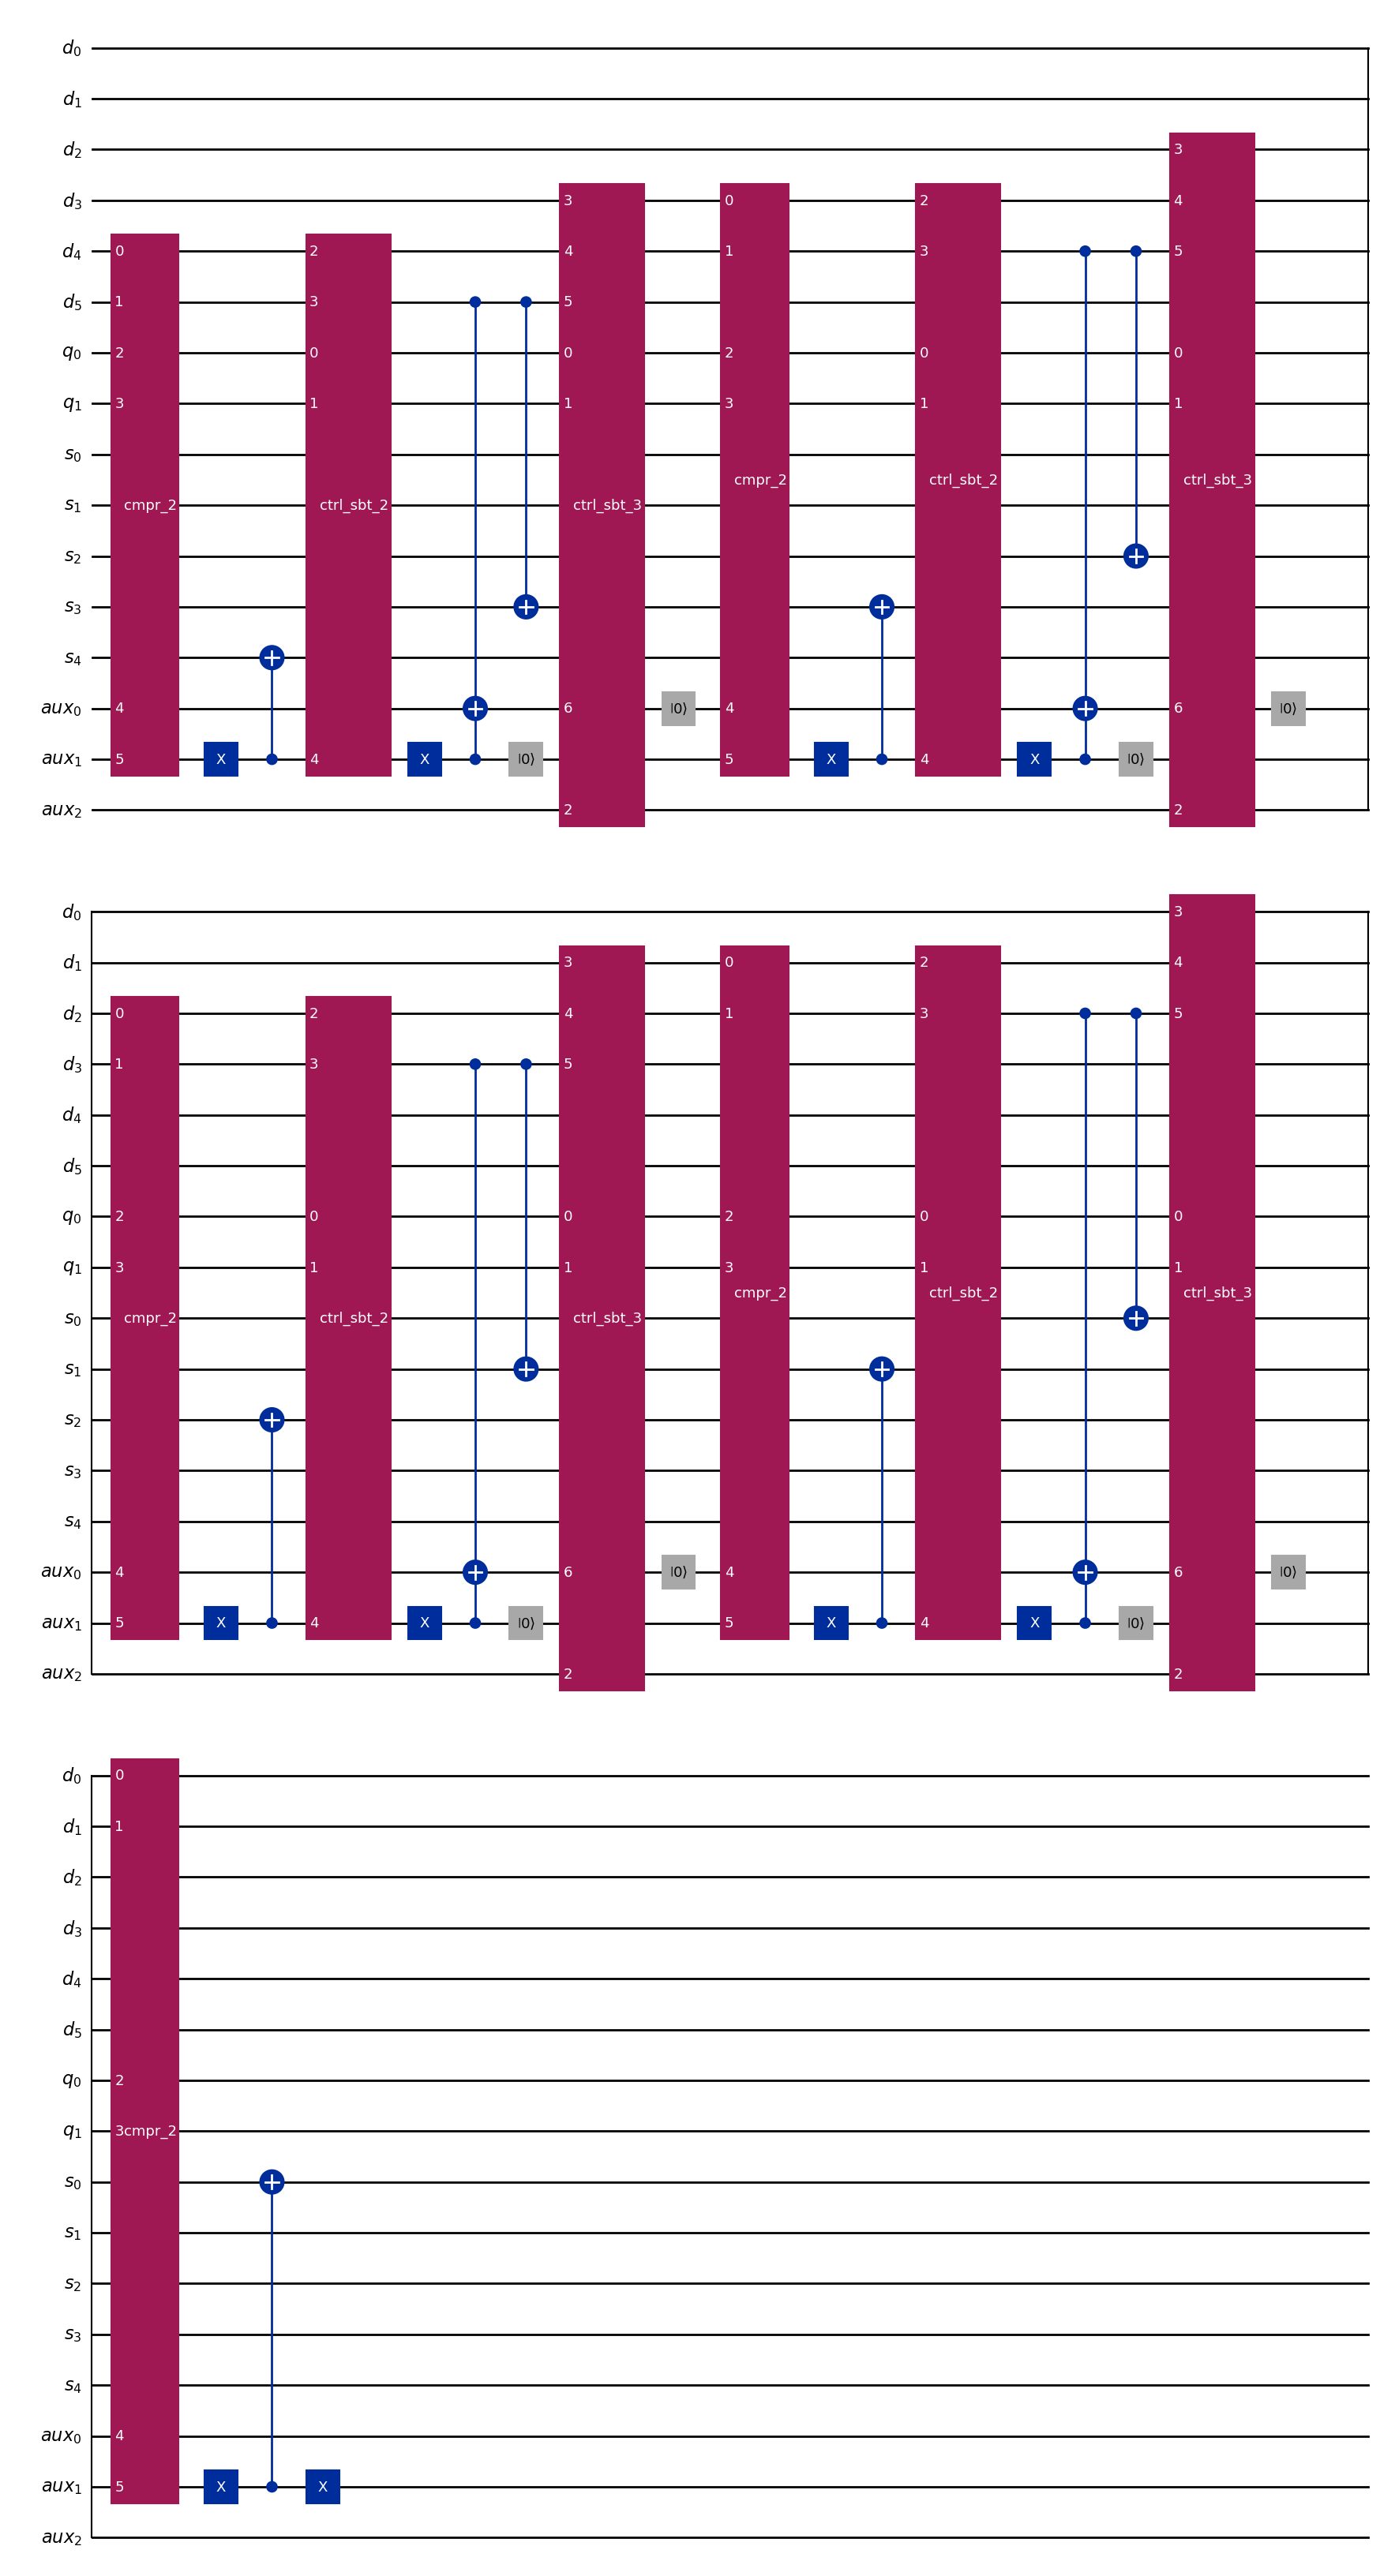

In [7]:
div_circuit = long_division_divider(6,2)
div_circuit.draw('mpl')

In [10]:
state = Statevector.from_label(
    #CC BB AA
    '000' + '00000' + '11' + '101011'
    )
state = state.evolve(div_circuit)
state.draw('latex')

<IPython.core.display.Latex object>